In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

#Math modules
import numpy as np
import time

#Models tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#from sklearn.ensemble import GradientBoostingClassifier as xgb

path = '/content/drive/MyDrive/PFE/'

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df=pd.read_csv(path + "df_total_csv_normalisee_Intrusion.csv", sep=';')
df=pd.read_csv(path + "df_total_csv_normalisee_DoH.csv", sep=';')
colonne = 'DoH'

## METRIQUES

In [ ]:
def ROC_curve(df, colonne, model, model_name):
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic for ' + model_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# MACHINE LEARNING

# Decision Tree Classifier

Paramètres
---

*   criterion{“gini”, “entropy”}, default=”gini” : mesurer la qualité d'une scission
*   splitter{“best”, “random”}, default=”best” : stratégie utilisée pour choisir la division à chaque nœud
*   max_depth int, default=None : profondeur maximale de l'arbre
*   min_samples_split int or float, default=2 : nombre minimum d'échantillons requis pour fractionner un nœud interne
*   min_samples_leaf int or float, default=1 : nombre minimum d'échantillons requis pour être au niveau d'un nœud feuille
*   min_weight_fraction_leaf float, default=0.0 : fraction pondérée minimale de la somme totale des poids (de tous les échantillons d'entrée) requis pour être au niveau d'un nœud feuille
*   max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None : nombre de fonctionnalités à prendre en compte lors de la recherche de la meilleure répartition
*   random_state int, RandomState instance or None, default=None : Contrôle le caractère aléatoire de l'estimateur
*   max_leaf_nodes int, default=None : Cultivez un arbre avec max_leaf_nodesde la meilleure façon
*   min_impurity_decrease float, default=0.0 : Un nœud sera scindé si cette scission induit une diminution de l'impureté supérieure ou égale à cette valeur.
*   min_impurity_split float, default=0 :Seuil d'arrêt précoce de la croissance des arbres.
*   class_weight dict, list of dict or “balanced”, default=None : Poids associés aux classes dans le formulaire 
*   ccp_alpha non-negative float, default=0.0 : Paramètre de complexité utilisé pour l'élagage à coût-complexité minimale.



## Definition du modele

In [ ]:
def DTC(df, colonne,criterion_param, splitter_param, max_depth_param,
                                 min_samples_split_param, min_samples_leaf_param, min_weight_fraction_leaf_param, 
                                 max_features_param, random_state_param, max_leaf_nodes_param, min_impurity_decrease_param, 
                                 min_impurity_split_param, class_weight_param, ccp_alpha_param):
    
    t_debut = time.time()

    print("Training Decision Tree Classifier Algo ...\n ")
    # Create Decision Tree classifer object
    DTC = DecisionTreeClassifier(criterion=criterion_param, splitter=splitter_param, max_depth=max_depth_param,
                                 min_samples_split=min_samples_split_param, min_samples_leaf=min_samples_leaf_param, 
                                 min_weight_fraction_leaf=min_weight_fraction_leaf_param, 
                                 max_features=max_features_param, random_state=random_state_param, 
                                 max_leaf_nodes=max_leaf_nodes_param, min_impurity_decrease=min_impurity_decrease_param, 
                                 min_impurity_split=min_impurity_split_param, class_weight=class_weight_param, 
                                 ccp_alpha=ccp_alpha_param)

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    
    # Train Decision Tree Classifer
    DTC = DTC.fit(X_train,y_train)
       
    y_pred_DTC = DTC.predict(X_test)
    
    # Metriques du Decision Tree Classifier
    
    print('\tReport Decision Tree Classifier \n\n', classification_report(y_test, y_pred_DTC))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour DTClassifier (en sec): ", np.round(t_total,4))
        
     
    ROC_curve(df, colonne, DTC, 'Decision Tree Classifier')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_DTC))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_DTC))
    print("\nPrecision :", precision_score(y_test, y_pred_DTC))
    print("\nF1 score :", f1_score(y_test, y_pred_DTC))

    return DTC

## Par défaut
criterion='gini', splitter='best', max_depth=None,
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, class_weight=None, ccp_alpha=0.0

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179714
         1.0       1.00      1.00      1.00    179284

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour DTClassifier (en sec):  145.9409


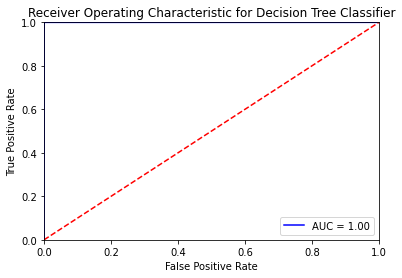


Matrice de confusion : 
 [[179626     88]
 [    79 179205]]

Accuracy :  0.9995348163499518

Precision : 0.9995091832921531

F1 score : 0.9995342701846465


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=None, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)
    

## Changement de maxdepth (profondeur de l'arbre)

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95    179714
         1.0       0.95      0.96      0.95    179284

    accuracy                           0.95    358998
   macro avg       0.95      0.95      0.95    358998
weighted avg       0.95      0.95      0.95    358998

Temps pour DTClassifier (en sec):  31.4666


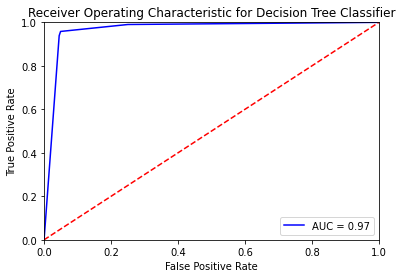


Matrice de confusion : 
 [[170749   8965]
 [  7393 171891]]

Accuracy :  0.9544342865419863

Precision : 0.9504301764940063

F1 score : 0.9545787749208641


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=2, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    179714
         1.0       0.96      0.99      0.97    179284

    accuracy                           0.97    358998
   macro avg       0.97      0.97      0.97    358998
weighted avg       0.97      0.97      0.97    358998

Temps pour DTClassifier (en sec):  34.9067


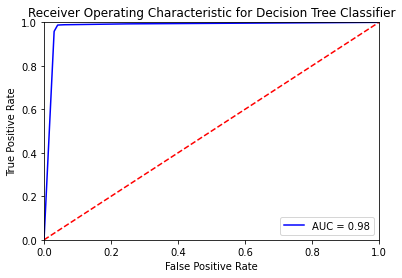


Matrice de confusion : 
 [[172225   7489]
 [  2166 177118]]

Accuracy :  0.9731056997532019

Precision : 0.9594327409036494

F1 score : 0.9734673295025159


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=3, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    179714
         1.0       0.97      0.99      0.98    179284

    accuracy                           0.98    358998
   macro avg       0.98      0.98      0.98    358998
weighted avg       0.98      0.98      0.98    358998

Temps pour DTClassifier (en sec):  38.8075


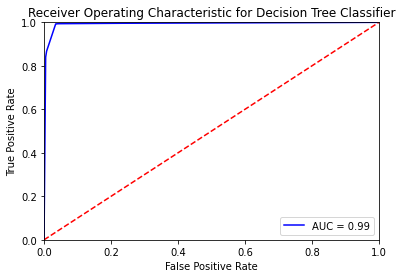


Matrice de confusion : 
 [[173684   6030]
 [  1241 178043]]

Accuracy :  0.9797464052724528

Precision : 0.9672412575445611

F1 score : 0.9799893768387564


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=4, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    179714
         1.0       0.99      0.99      0.99    179284

    accuracy                           0.99    358998
   macro avg       0.99      0.99      0.99    358998
weighted avg       0.99      0.99      0.99    358998

Temps pour DTClassifier (en sec):  41.6726


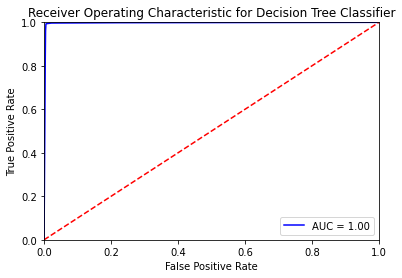


Matrice de confusion : 
 [[178535   1179]
 [  1154 178130]]

Accuracy :  0.9935013565535185

Precision : 0.9934247583779955

F1 score : 0.9934940168938042


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=5, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

## Changement du criterion (avec max_depth = 3)

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    179714
         1.0       0.96      0.99      0.97    179284

    accuracy                           0.97    358998
   macro avg       0.97      0.97      0.97    358998
weighted avg       0.97      0.97      0.97    358998

Temps pour DTClassifier (en sec):  35.2129


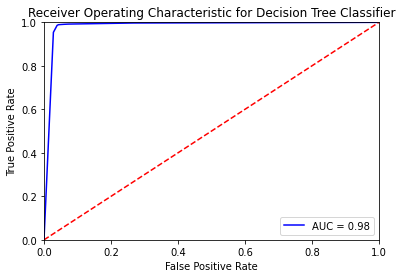


Matrice de confusion : 
 [[172573   7141]
 [  2385 176899]]

Accuracy :  0.9734650332313829

Precision : 0.961198652466855

F1 score : 0.9737809778599817


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='entropy', splitter_param='best', max_depth_param=3, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

## Changement du min_weight_fraction 0.0 -> 0.2 (avec max_depth = 3 et criterion = entropy)




Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91    179714
         1.0       0.99      0.81      0.89    179284

    accuracy                           0.90    358998
   macro avg       0.91      0.90      0.90    358998
weighted avg       0.91      0.90      0.90    358998

Temps pour DTClassifier (en sec):  29.9616


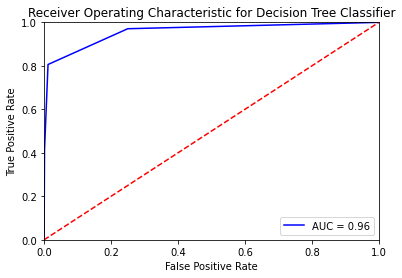


Matrice de confusion : 
 [[177569   2145]
 [ 34748 144536]]

Accuracy :  0.8972334107710906

Precision : 0.9853764291216994

F1 score : 0.8868191370239137


In [ ]:
dtc_1 = DTC(df, colonne,criterion_param='entropy', splitter_param='best', max_depth_param=3, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.2, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

## Randomized search

In [ ]:
def DTC_Randomized_Search(df, colonne):
    print('Compiling the Randomized Search for DTC ...\n')
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
    
    # Setup the parameters and distributions to sample from: param_dist
    param_grid = {"criterion":["gini", "entropy"], 
                  "splitter":["best", "random"], 
                  "max_depth":[None, 1, 2],
                  "min_samples_split":[2,3], 
                  "min_samples_leaf":[1,2,3], 
                  "min_weight_fraction_leaf":[0.0, 0.2, 0.5], 
                  "max_features":["auto", "sqrt", "log2", None, 1, 2], 
                  "random_state":[None, 42], 
                  "max_leaf_nodes":[None, 2, 3],
                  "min_impurity_decrease":[0.0, 1.0], 
                  "class_weight":[None,'balanced'], 
                  "ccp_alpha":[ 0.0, 1.0, 2.0]}
    
    # Instantiate a Decision Tree classifier: tree
    DTC = DecisionTreeClassifier()
    
    # Instantiate the RandomizedSearchCV object: tree_cv
    rs_dtc = RandomizedSearchCV(DTC, param_grid, cv=5)
    
    # Fit it to the data
    rs_dtc.fit(X_train,y_train)
    
    # Print the tuned parameters and score
    print("Les meilleurs parametres sont :\n {}".format(rs_dtc.best_params_))
    print("Le meilleur score est : {} \n".format(np.round(rs_dtc.best_score_,4)))
    
    return rs_dtc

In [ ]:
#rs_dtc = DTC_Randomized_Search(df, colonne)

# Random Forest Classifier

Paramètres
---

*   n_estimators=int, par défaut = 100
Le nombre d'arbres dans la forêt.
*   criterion {"gini", "entropy"}, default = "gini"
La fonction pour mesurer la qualité d'une scission.
*   max_depth int, par défaut = Aucun
La profondeur maximale de l'arbre.
*   min_samples_split int ou float, par défaut = 2
Le nombre minimum d'échantillons requis pour fractionner un nœud interne
*   min_samples_leaf int ou float, par défaut = 1
Le nombre minimum d'échantillons requis pour être au niveau d'un nœud feuille 
*   min_weight_fraction_leaf float, par défaut = 0,0
La fraction pondérée minimale de la somme totale des poids (de tous les échantillons d'entrée) requis pour être au niveau d'un nœud feuille
*   max_features {"auto", "sqrt", "log2"}, int ou float, default = "auto"
Le nombre de fonctionnalités à prendre en compte lors de la recherche de la meilleure répartition
*   max_leaf_nodes int, par défaut = None
Cultivez des arbres avec max_leaf_nodesde la meilleure façon
*   min_impurity_decrease float, par défaut = 0,0
Un nœud sera scindé si cette scission induit une diminution de l'impureté supérieure ou égale à cette valeur.
*   min_impurity_split float, par défaut = Aucun
Seuil d'arrêt précoce de la croissance des arbres. 
*   bootstrap bool, par défaut = True
Indique si des échantillons bootstrap sont utilisés lors de la création d'arbres
*   oob_score bool, par défaut = False
Indique s'il faut utiliser des échantillons hors sac pour estimer la précision de généralisation
*   n_jobs int, par défaut = Aucun
Le nombre de travaux à exécuter en parallèle
*   random_state int, instance RandomState ou None, par défaut = None
Contrôle à la fois le caractère aléatoire du bootstrap des échantillons utilisés lors de la construction d'arbres 
*   verbose int, par défaut = 0
*   warm_start bool, par défaut = False
Lorsqu'il est défini sur True, réutilisez la solution de l'appel précédent pour ajuster et ajouter plus d'estimateurs à l'ensemble, sinon, ajustez simplement une toute nouvelle forêt
*   class_weight {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None Poids associés aux classes dans le formulaire
*   ccp_alpha non négatif, par défaut = 0,0
Paramètre de complexité utilisé pour l'élagage à coût-complexité minim
*   max_samples int ou float, par défaut = Aucun
Si bootstrap est Vrai, le nombre d'échantillons à tirer de X pour entraîner chaque estimateur de base


## Definition du modele

In [ ]:
def RFC(df, colonne,n_estimators_param, 
                                 criterion_param, 
                                 max_depth_param, 
                                 min_samples_split_param, 
                                 min_samples_leaf_param, 
                                 min_weight_fraction_leaf_param, 
                                 max_features_param, 
                                 max_leaf_nodes_param, 
                                 min_impurity_decrease_param, 
                                 min_impurity_split_param, 
                                 bootstrap_param, 
                                 oob_score_param, 
                                 n_jobs_param, 
                                 random_state_param, 
                                 warm_start_param, 
                                 class_weight_param, 
                                 ccp_alpha_param, 
                                 max_samples_param):
    
    t_debut = time.time()
    print("Training Random Forest Classifier Algo ... \n")
    # Create Random Forest classifer object
    RFC = RandomForestClassifier(n_estimators=n_estimators_param, 
                                 criterion=criterion_param, 
                                 max_depth=max_depth_param, 
                                 min_samples_split=min_samples_split_param, 
                                 min_samples_leaf=min_samples_leaf_param, 
                                 min_weight_fraction_leaf=min_weight_fraction_leaf_param, 
                                 max_features=max_features_param, 
                                 max_leaf_nodes=max_leaf_nodes_param, 
                                 min_impurity_decrease=min_impurity_decrease_param, 
                                 min_impurity_split=min_impurity_split_param, 
                                 bootstrap=bootstrap_param, 
                                 oob_score=oob_score_param, 
                                 n_jobs=n_jobs_param, 
                                 random_state=random_state_param, 
                                 verbose=0, 
                                 warm_start=warm_start_param, 
                                 class_weight=class_weight_param, 
                                 ccp_alpha=ccp_alpha_param, 
                                 max_samples=max_samples_param)
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
    

    # Train Random Forest Classifer
    RFC = RFC.fit(X_train,y_train)
        
    y_pred_RFC = RFC.predict(X_test)
    
    # Metriques du Random Forest Classifier
    
    print('\t Report Random Forest Classifier \n\n', classification_report(y_test, y_pred_RFC))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour RFClassifier (en sec): ", np.round(t_total,4))

    ROC_curve(df, colonne, RFC, 'Random Forest Classifier')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_RFC))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_RFC))
    print("\nPrecision :", precision_score(y_test, y_pred_RFC))
    print("\nF1 score :", f1_score(y_test, y_pred_RFC))
    
    return RFC

## Par défaut

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour RFClassifier (en sec):  771.6034


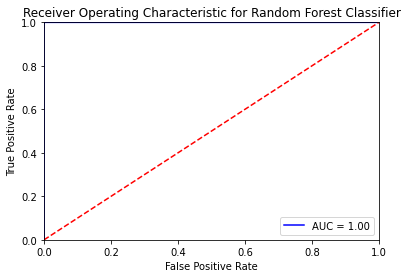


Matrice de confusion : 
 [[179786     76]
 [    13 179123]]

Accuracy :  0.9997520877553635

Precision : 0.9995758904904604

F1 score : 0.9997516290621905


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=None, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

## Changement de n_estimator

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour RFClassifier (en sec):  413.0139


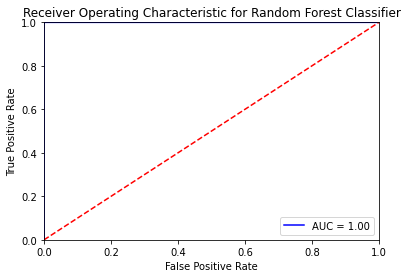


Matrice de confusion : 
 [[179769     93]
 [    24 179112]]

Accuracy :  0.9996740928918824

Precision : 0.9994810412655897

F1 score : 0.9996734953577737


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=50, criterion_param='gini', 
            max_depth_param=None, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour RFClassifier (en sec):  1533.9266


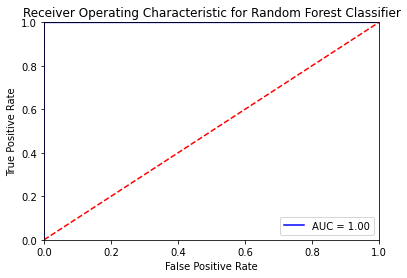


Matrice de confusion : 
 [[179771     91]
 [    20 179116]]

Accuracy :  0.9996908060769141

Precision : 0.9994922073356509

F1 score : 0.9996902409144311


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=200, criterion_param='gini', 
            max_depth_param=None, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

## Changement de max_depth ( et garde n_estimator = 100)

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93    179862
         1.0       0.94      0.92      0.93    179136

    accuracy                           0.93    358998
   macro avg       0.93      0.93      0.93    358998
weighted avg       0.93      0.93      0.93    358998

Temps pour RFClassifier (en sec):  85.1324


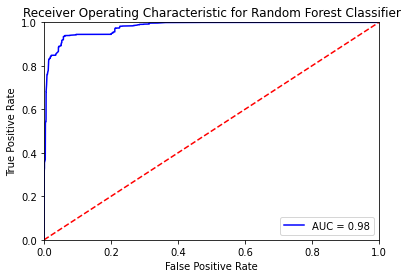


Matrice de confusion : 
 [[170091   9771]
 [ 14470 164666]]

Accuracy :  0.9324759469412086

Precision : 0.9439855076617919

F1 score : 0.9314399006711485


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=1, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96    179862
         1.0       0.96      0.97      0.96    179136

    accuracy                           0.96    358998
   macro avg       0.96      0.96      0.96    358998
weighted avg       0.96      0.96      0.96    358998

Temps pour RFClassifier (en sec):  143.7937


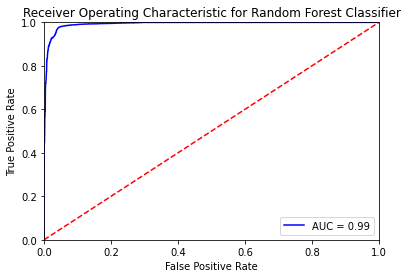


Matrice de confusion : 
 [[173072   6790]
 [  6216 172920]]

Accuracy :  0.9637713859130135

Precision : 0.9622169050136331

F1 score : 0.9637560401955158


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=2, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    179862
         1.0       0.98      0.99      0.98    179136

    accuracy                           0.98    358998
   macro avg       0.98      0.98      0.98    358998
weighted avg       0.98      0.98      0.98    358998

Temps pour RFClassifier (en sec):  172.039


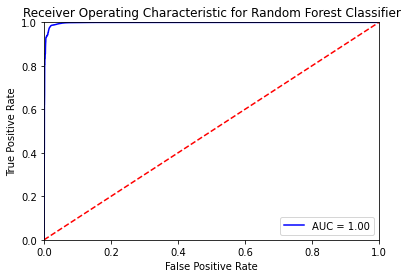


Matrice de confusion : 
 [[175863   3999]
 [  2487 176649]]

Accuracy :  0.9819330469807631

Precision : 0.9778630264381559

F1 score : 0.9819725168434393


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=3, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    179862
         1.0       0.99      0.99      0.99    179136

    accuracy                           0.99    358998
   macro avg       0.99      0.99      0.99    358998
weighted avg       0.99      0.99      0.99    358998

Temps pour RFClassifier (en sec):  252.843


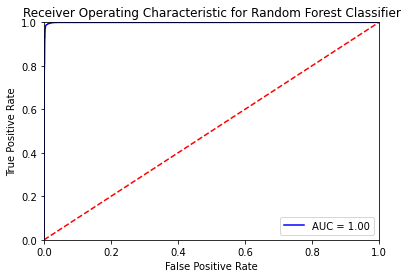


Matrice de confusion : 
 [[177736   2126]
 [  1253 177883]]

Accuracy :  0.9905876912963304

Precision : 0.9881894794149182

F1 score : 0.9905915438054269


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=5, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param=None, ccp_alpha_param=0.0, max_samples_param=None)

## Changement de class_weight = 'balanced'

Training Random Forest Classifier Algo ... 

	 Report Random Forest Classifier 

               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98    179862
         1.0       0.97      0.98      0.98    179136

    accuracy                           0.98    358998
   macro avg       0.98      0.98      0.98    358998
weighted avg       0.98      0.98      0.98    358998

Temps pour RFClassifier (en sec):  192.538


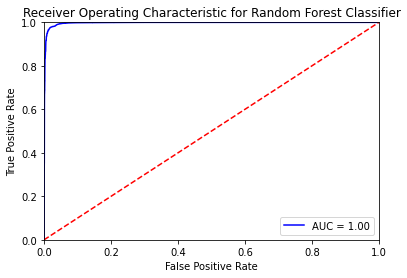


Matrice de confusion : 
 [[174042   5820]
 [  2920 176216]]

Accuracy :  0.9756544604705318

Precision : 0.9680283020940913

F1 score : 0.975801003400042


In [ ]:
rfc_1 = RFC(df, colonne,n_estimators_param=100, criterion_param='gini', 
            max_depth_param=3, min_samples_split_param=2, min_samples_leaf_param=1, 
            min_weight_fraction_leaf_param=0.0, max_features_param='auto', max_leaf_nodes_param=None, 
            min_impurity_decrease_param=0.0, min_impurity_split_param=None, bootstrap_param=True, 
            oob_score_param=False, n_jobs_param=None, random_state_param=None, warm_start_param=False, 
            class_weight_param='balanced', ccp_alpha_param=0.0, max_samples_param=None)

## Randomized search

In [ ]:
def RFC_Randomized_Search(df, colonne):
    
    print('Compiling the Randomized Search for RFC ... \n')
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }
    # Create a based model
    RFC = RandomForestClassifier()
    # Instantiate the grid search model
    rs_rfc = RandomizedSearchCV(RFC, param_grid, cv = 3)
    rs_rfc.fit(X_train,y_train)
    
    # Print the tuned parameters and score
    print("Les meilleurs parametres sont :\n {}".format(rs_rfc.best_params_))
    print("Le meilleur score est : {} \n".format(np.round(rs_rfc.best_score_,4)))
    
    return rs_rfc

In [ ]:
#rs_rfc = RFC_Randomized_Search(df, colonne)

# XGBoost Classifier

## Parametres
---

*    booster[default = gbtree]
Quel booster utiliser. 
*    verbosity [par défaut = 1]
*    nthread [par défaut au nombre maximum de threads disponibles s'il n'est pas défini] Nombre de threads parallèles utilisés pour exécuter XGBoost.
*    eta[par défaut = 0,3, alias: learning_rate]
Réduction de la taille des pas utilisée dans la mise à jour pour éviter le surajustement. [0,1]
*    gamma[par défaut = 0, alias: min_split_loss]
Réduction minimale des pertes requise pour effectuer une partition supplémentaire sur un nœud feuille de l'arbre. [0, ∞]
*    max_depth [par défaut = 6]
Profondeur maximale d'un arbre. [0, ∞] 
*    min_child_weight [par défaut = 1]
Somme minimale du poids d'instance (hesse) nécessaire chez un enfant.[0, ∞]
*    max_delta_step [par défaut = 0]
Pas de delta maximum, nous autorisons chaque sortie feuille à être. [0, ∞]
*    subsample [par défaut = 1]
Ratio de sous-échantillon des instances d'entraînement. Le définir sur 0,5 signifie que XGBoost échantillonnerait aléatoirement la moitié des données d'entraînement avant de faire pousser des arbres.(0,1]
*    sampling_method[default = uniform]
Méthode à utiliser pour échantillonner les instances d'entraînement.
uniform: 
gradient_based: 

*    colsample_bytree, colsample_bylevel, colsample_bynode[Par défaut = 1]
Il s'agit d'une famille de paramètres pour le sous-échantillonnage des colonnes.

*    lambda[par défaut = 1, alias: reg_lambda]

Terme de régularisation L2 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.

*    alpha[par défaut = 0, alias: reg_alpha]

Terme de régularisation L1 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.

*    scale_pos_weight [par défaut = 1]

Contrôlez l'équilibre des poids positifs et négatifs, utile pour les classes déséquilibrées. Une valeur typique à considérer: . Voir Réglage des paramètres pour plus de détails. Voir également la démo du concours Higgs Kaggle pour des exemples: R , py1 , py2 , py3 .sum(negative instances) / sum(positive instances)

## Definition du modele

In [ ]:
def XGB(df, colonne, max_depth_param,
            learning_rate_param ,
            subsample_param,
             min_child_weight_param,
            gamma_param,
            reg_lambda_param):
    
    t_debut = time.time()
    print("Training XGBoost Classifier Algo ... \n")
    # Create XGBoost Classifier model
    
    XGB = xgb.XGBClassifier(objective="binary:logistic",max_depth=max_depth_param,
            learning_rate=learning_rate_param ,
            subsample=subsample_param,
            min_child_weight= min_child_weight_param,
            gamma=gamma_param,
            reg_lambda=reg_lambda_param)
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
    
    # Train XGBoost Classifer
    XGB = XGB.fit(X_train,y_train)
    
    y_pred_XGB = XGB.predict(X_test)
    
    # Metriques du XGBoost Classifier
    
    print('\tReport XGBoost Classifier \n\n', classification_report(y_test, y_pred_XGB))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour XGBoost (en sec): ", np.round(t_total,4))

    ROC_curve(df, colonne, XGB, 'XGBoost Classifier')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_XGB))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_XGB))
    print("\nPrecision :", precision_score(y_test, y_pred_XGB))
    print("\nF1 score :", f1_score(y_test, y_pred_XGB))
    
    return XGB


## Par défaut

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  473.4488


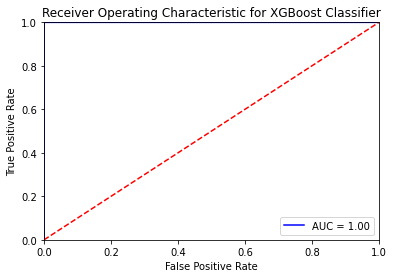


Matrice de confusion : 
 [[179847     15]
 [     5 179131]]

Accuracy :  0.9999442893832278

Precision : 0.9999162694115414

F1 score : 0.9999441780496927


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=6,
            learning_rate_param= 0.3,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

## Changement de max depth

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  590.9678


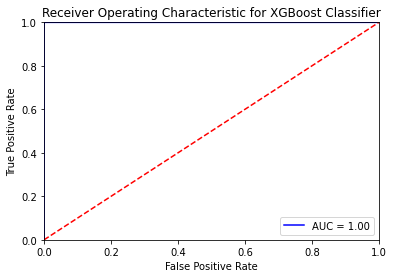


Matrice de confusion : 
 [[179853      9]
 [     6 179130]]

Accuracy :  0.9999582170374208

Precision : 0.9999497596838209

F1 score : 0.9999581327192798


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=7,
            learning_rate_param= 0.3,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  646.5635


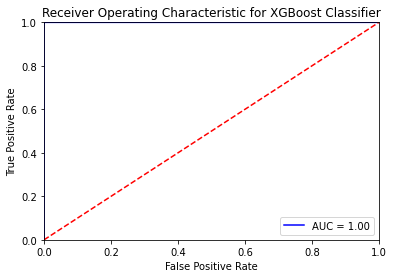


Matrice de confusion : 
 [[179849     13]
 [     5 179131]]

Accuracy :  0.999949860444905

Precision : 0.9999274326798553

F1 score : 0.9999497599642738


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=8,
            learning_rate_param= 0.3,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

## Changement du learning rate

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  501.429


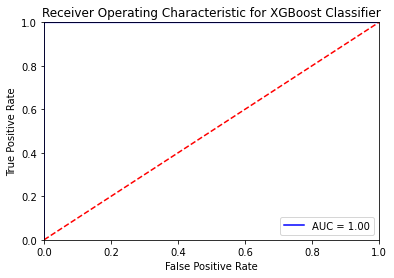


Matrice de confusion : 
 [[179852     10]
 [     3 179133]]

Accuracy :  0.999963788099098

Precision : 0.9999441786729037

F1 score : 0.9999637154284788


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=6,
            learning_rate_param= 0.5,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  479.7259


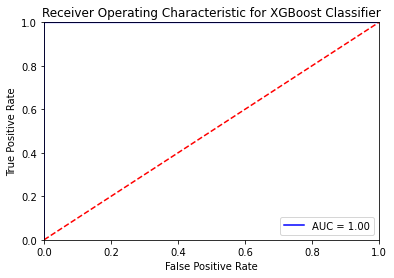


Matrice de confusion : 
 [[179847     15]
 [     4 179132]]

Accuracy :  0.9999470749140664

Precision : 0.9999162698789262

F1 score : 0.999946969295222


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=6,
            learning_rate_param= 0.7,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

Training XGBoost Classifier Algo ... 

	Report XGBoost Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179862
         1.0       1.00      1.00      1.00    179136

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour XGBoost (en sec):  415.1059


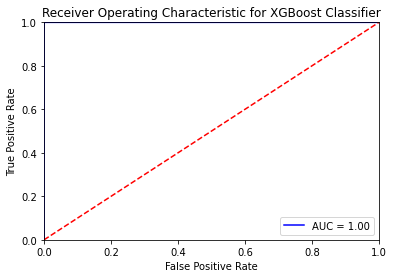


Matrice de confusion : 
 [[179848     14]
 [     5 179131]]

Accuracy :  0.9999470749140664

Precision : 0.9999218510145413

F1 score : 0.9999469689991934


In [ ]:
xgb_1 = XGB(df, colonne, max_depth_param=6,
            learning_rate_param=1,
            subsample_param=1,
             min_child_weight_param=1,
            gamma_param=0,
            reg_lambda_param=1)

## Randomized search

In [ ]:
def XGBoost_Randomized_Search(df, colonne):
    print('Compiling the Randomized Search for XGBoost ... \n')
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    XGB = xgb.XGBClassifier()
    
    param_grid = {
            'max_depth': [6, 10, 15, 20],
            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
            'gamma': [0, 0.25, 0.5, 1.0],
            'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]}
   
    rs_XGB = RandomizedSearchCV(XGB, param_grid, n_iter=20,
                                n_jobs=1, verbose=0, cv=2,
                                scoring='neg_log_loss', refit=False, random_state=42)
    rs_XGB.fit(X_train, y_train)
    
    # Print the tuned parameters and score
    print("Les meilleurs parametres sont :\n {}".format(rs_XGB.best_params_))
    print("Le meilleur score est : {}\n".format(np.round(rs_XGB.best_score_,4)))
    
    return rs_XGB

In [ ]:
#rs_XGB =XGBoost_Randomized_Search(df, colonne)